In [47]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
import itertools

In [570]:
positions = np.load('Results/pos_solid_II.npy')
kinetic = np.load('Results/kinetic_solid_II.npy')
potential = np.load('Results/potential_solid_II.npy')

In [563]:
step = 10000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

Text(0, 0.5, 'Temperature (kT)')

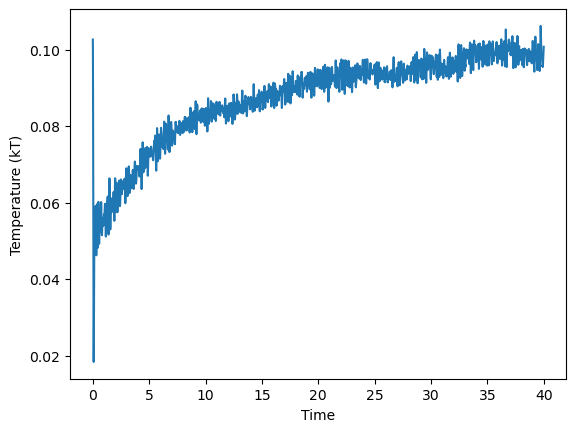

In [569]:
num_particles = positions.shape[1]
time = np.arange(0,40+.004,0.004)
fig, ax = plt.subplots()
ax.plot(time,kinetic*2/(3*num_particles))
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (kT)")

In [538]:
positions = np.load('/Users/Edrick/Desktop/pos_solid.npy')
kinetic = np.load('/Users/Edrick/Desktop/kin_solid.npy')
potential = np.load('/Users/Edrick/Desktop/pot_solid.npy')

In [523]:
step = 10000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

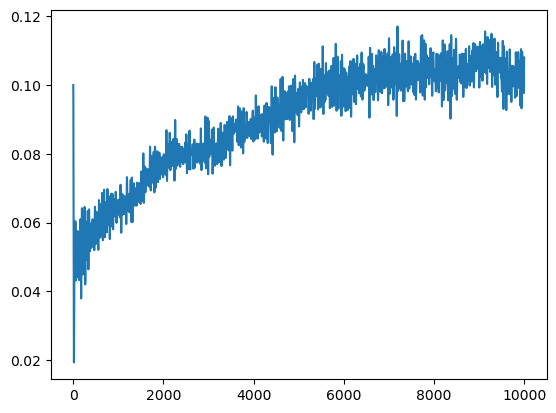

In [542]:
num_particles = positions.shape[1]
plt.plot(kinetic*2/(3*num_particles))

Text(0, 0.5, 'Energy')

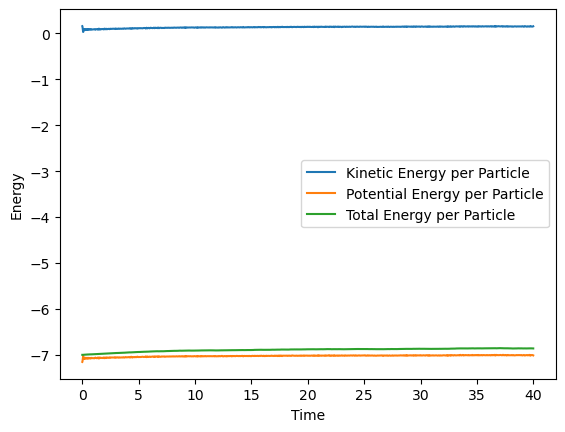

In [571]:
num_particles = positions.shape[1]
fig, ax = plt.subplots()
ax.plot(time,kinetic/num_particles,label = "Kinetic Energy per Particle")
ax.plot(time,potential/num_particles, label = "Potential Energy per Particle")
ax.plot(time,(kinetic+potential)/num_particles, label = "Total Energy per Particle")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Energy")

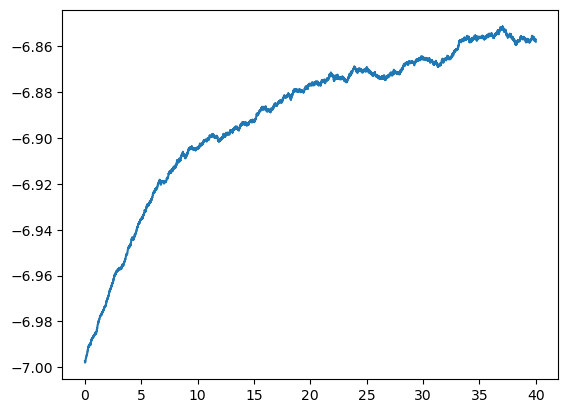

In [573]:
fig, ax = plt.subplots()
ax.plot(time,(kinetic+potential)/num_particles, label = "Total Energy per Particle")


# Velocity Autocorrlation Function

In [524]:
kinetic = np.load('VC/Long_004/kinetic.npy')
potential = np.load('VC/Long_004/potential.npy')

In [498]:
step = 0
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

Text(0, 0.5, 'Energy')

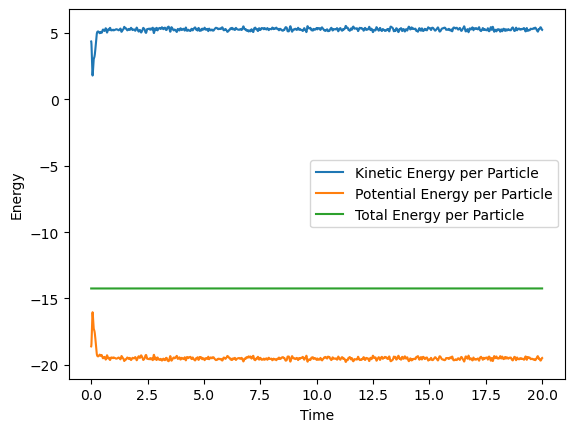

In [536]:
num_particles = positions.shape[1]
time = np.arange(0,20+.004,0.004)
fig, ax = plt.subplots()
ax.plot(time,kinetic/num_particles,label = "Kinetic Energy per Particle")
ax.plot(time,potential/num_particles, label = "Potential Energy per Particle")
ax.plot(time,(kinetic+potential)/num_particles, label = "Total Energy per Particle")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Energy")

Text(0, 0.5, 'Energy')

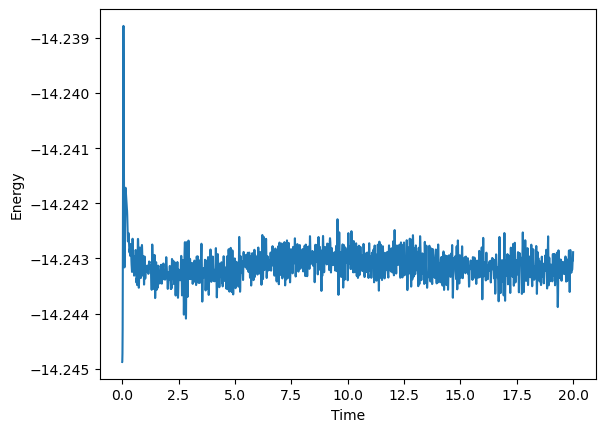

In [535]:
fig, ax = plt.subplots()
ax.plot(time,(kinetic+potential)/num_particles)
ax.set_xlabel("Time")
ax.set_ylabel("Energy")


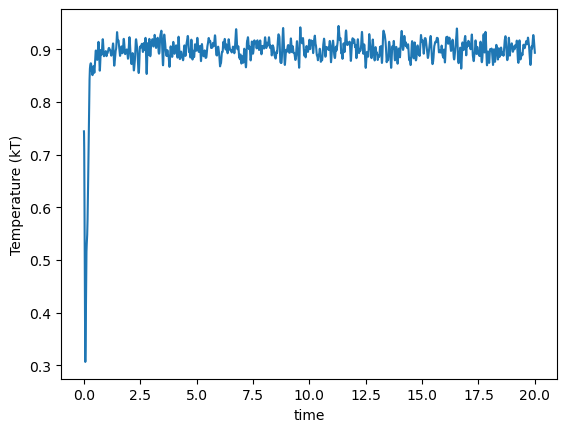

In [502]:
plt.plot(time,kinetic*2/(3*num_particles))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

In [482]:
import numpy as np

#Dimensionality of the system
ndim = 3

def comp_tau(corr_func, Ndecorr, dt):

    return np.trapz(corr_func[:Ndecorr]**2, dx=dt)

def correlation_FFT(x1, x2, norm=True, mean=False):

    #computing the lenght of the vectors
    n1 = len(x1)
    n2 = len(x2)

    #checking if the vectors has the same lenght (MANDATORY)
    if (n1!=n2):
        print('different length vectors!')
        exit()

    #rename the variable
    n = n1

    #statistical analysis on data
    var1 = np.var(x1)
    var2 = np.var(x2)
    xx1 = x1
    xx2 = x2

    if mean==True:
        xx1 = x1 - np.mean(x1)
        xx2 = x2 - np.mean(x2)

    #computing correlation
    result = np.correlate(xx1, xx2, mode="full")[-n:]
    result /= np.arange(n, 0, -1)

    #normalizing the correlation function
    norm1 = np.sqrt(var1)
    norm2 = np.sqrt(var2)

    if norm:
        result /= (norm1*norm2)
        return result
    else:
        return result
def Velocity_CorrFunc(inputfile="velocity.out", norm=False, mean=False):

    Nt = 5001 # number of timesteps
    Npart = 1000# Number of particles
    Ndecorr = 10# Number of steps for decorrelation
    dt = 0.004 # timestep

    vel_filename = "velocity.out" # filename with velocities
    #data=np.loadtxt(vel_filename, unpack=True,usecols=(0, 1, 2),delimiter=" ")


    vloadx, vloady, vloadz = np.loadtxt(vel_filename, unpack=True, usecols=(0, 1, 2),delimiter=" ")

    vx, vy, vz = np.array(np.split(vloadx, Nt)), np.array(np.split(vloady, Nt)), np.array(np.split(vloadz, Nt))
    vx, vy, vz = np.swapaxes(vx, 0, 1), np.swapaxes(vy, 0, 1), np.swapaxes(vz, 0, 1)

    VCTxx = np.array([correlation_FFT(vx[i], vx[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTxy = np.array([correlation_FFT(vx[i], vy[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTxz = np.array([correlation_FFT(vx[i], vz[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTyx = np.array([correlation_FFT(vy[i], vx[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTyy = np.array([correlation_FFT(vy[i], vy[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTyz = np.array([correlation_FFT(vy[i], vz[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTzx = np.array([correlation_FFT(vz[i], vx[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTzy = np.array([correlation_FFT(vz[i], vy[i], norm=norm, mean=mean) for i in range(Npart)])
    VCTzz = np.array([correlation_FFT(vz[i], vz[i], norm=norm, mean=mean) for i in range(Npart)])

    VCT = np.array([[VCTxx, VCTxy, VCTxz], [VCTyx, VCTyy, VCTyz], [VCTzx, VCTzy, VCTzz]])

    AvVCT = np.mean(VCT, axis=2)

    if norm==False:

        return AvVCT

    else:

        t = np.arange(Nt)
        tau_c = 2.*np.array([ [comp_tau(AvVCT[l][m], Ndecorr, dt) for m in range(ndim)] for l in range(ndim)])
        err = np.array([ [np.sqrt(tau_c[l][m]/(Npart*dt*(Nt - t)))*(1.-np.abs(AvVCT[l][m])) for m in range(ndim)] for l in range(ndim)])

        return AvVCT, err

def Diffusion_VCT(inputfile="velocity.out",tensor=False, DvsTau=False):

    VCT = Velocity_CorrFunc(inputfile=inputfile,mean=False,norm=False) # Velocity correlation function
#    VCT = vacf# Velocity correlation function
    dt = 0.004 # timestep
    Nt = 5001# Ntimesteps

    if DvsTau:

        D = np.array([ [ [np.trapz(VCT[i][j][:n+1], dx=dt) for n in range(Nt)] for j in range(ndim)] for i in range(ndim)])

    else:

        D = np.array([ [np.trapz(VCT[i][j][:Ndecorr], dx=dt) for j in range(ndim)] for i in range(ndim)])

    if tensor==False:

        D = np.mean([D[0][0], D[1][1], D[2][2]])

    return D


if __name__ == '__main__':

    inputfile = "velocity.out"
    output_AvVCF = "AvVCF.out"
    output_Diff = "Diff.out"
    AvVCF = Velocity_CorrFunc(inputfile=inputfile,mean=True,norm=True);
    D = Diffusion_VCT(inputfile=inputfile,tensor=True, DvsTau=True)

    np.savetxt(output_AvVCF, np.c_[np.arange(5001), AvVCF[0][0][0], AvVCF[1][0][0], AvVCF[0][1][1], AvVCF[1][1][1], AvVCF[0][2][2], AvVCF[1][2][2]])
    np.savetxt(output_Diff, np.c_[np.arange(5001), D[0][0], D[1][1], D[2][2]])


# vacf_outfile=open("vacf.dat","w")
# vacf,err=Velocity_CorrFunc()
# diffusion=Diffusion_VCT()
# np.savetxt(vacf_outfile)

In [417]:
kinetic = np.load('Results/test_kin_CORR.npy')
potential = np.load('Results/test_pot_CORR.npy')

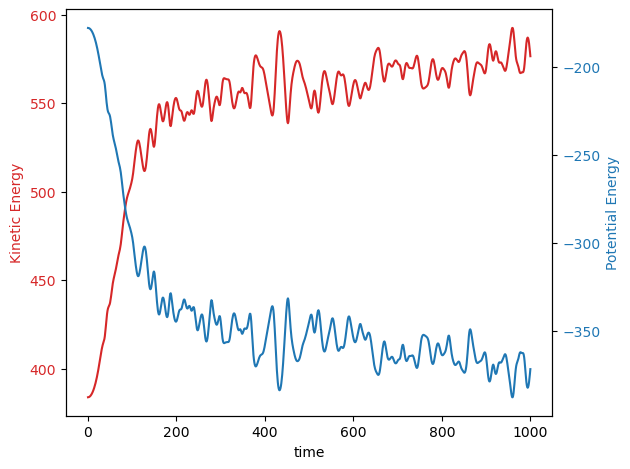

In [418]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

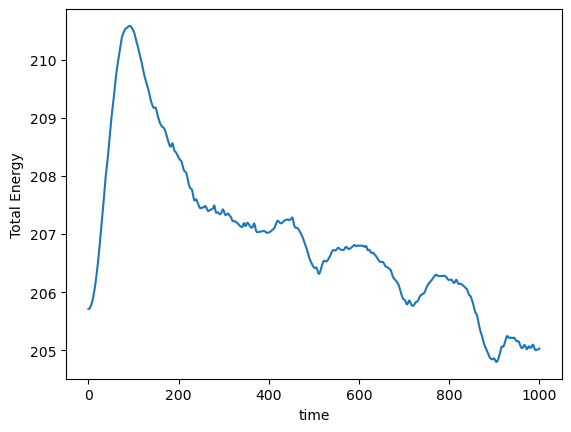

In [419]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [421]:
kinetic = np.load('Results/test_kin_NOCORR.npy')
potential = np.load('Results/test_pot_NOCORR.npy')

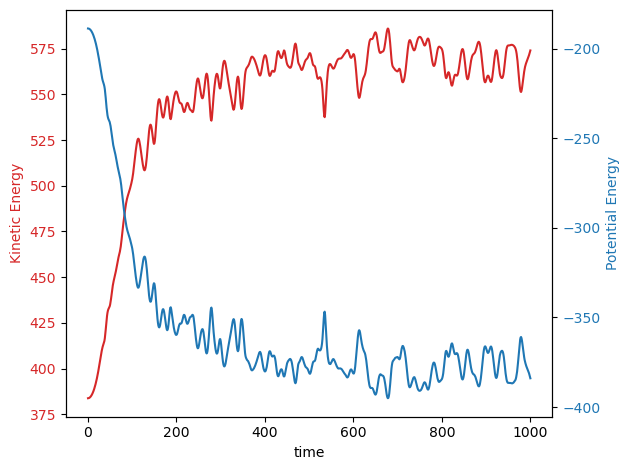

In [422]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

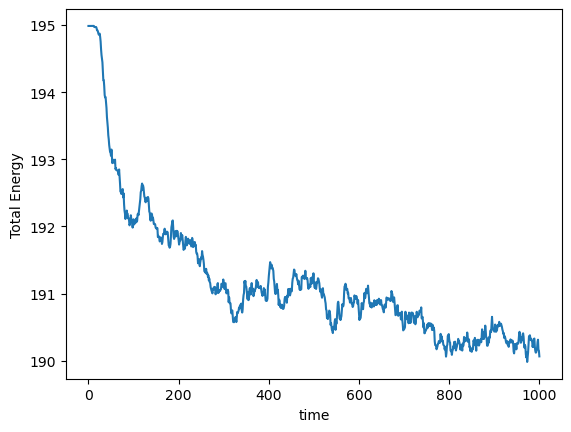

In [423]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

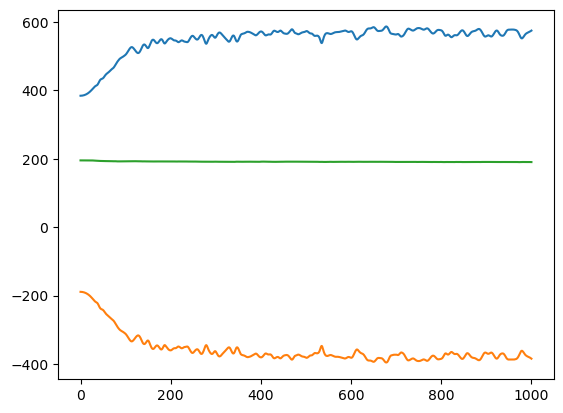

In [424]:
plt.plot(kinetic)
plt.plot(potential)
plt.plot(kinetic+potential)

In [425]:
kinetic = np.load('Results/test_kin_SEMICORR.npy')
potential = np.load('Results/test_pot_SEMICORR.npy')

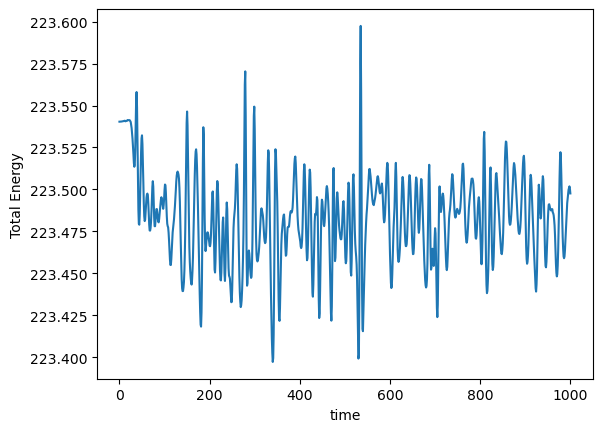

In [426]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

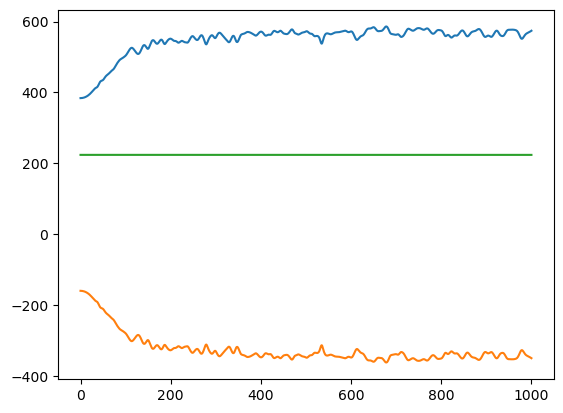

In [427]:
plt.plot(kinetic)
plt.plot(potential)
plt.plot(kinetic+potential)

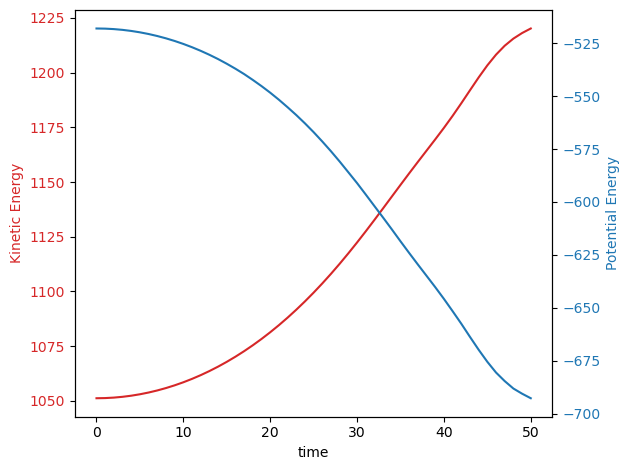

In [400]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

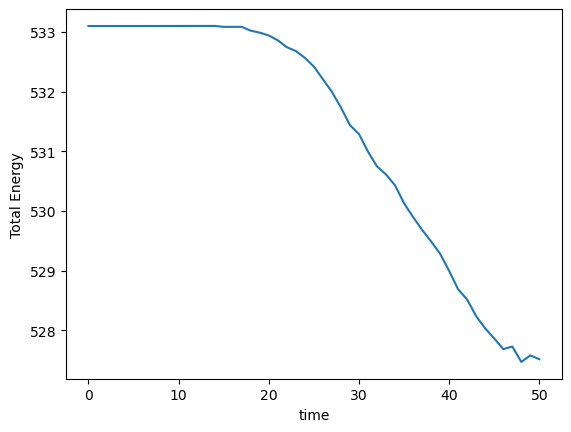

In [401]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [395]:
positions = np.load('Results/test_pos.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

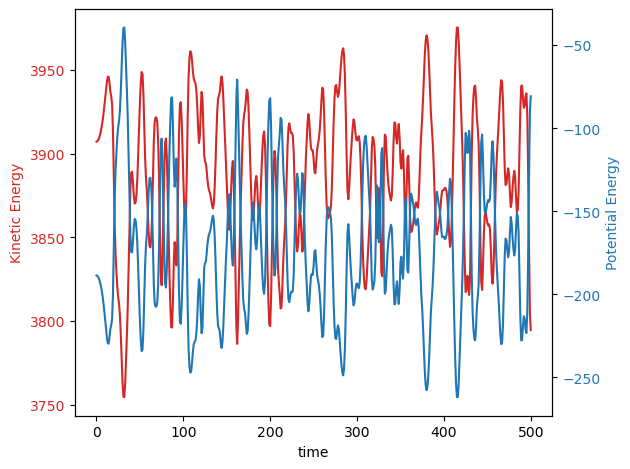

In [396]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

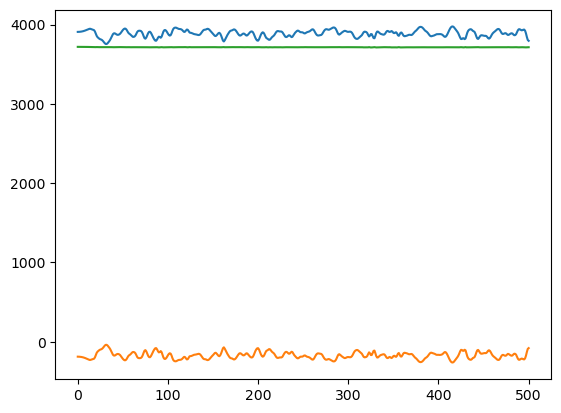

In [397]:
plt.plot(kinetic)
plt.plot(potential)
plt.plot(potential+kinetic)
plt.show()

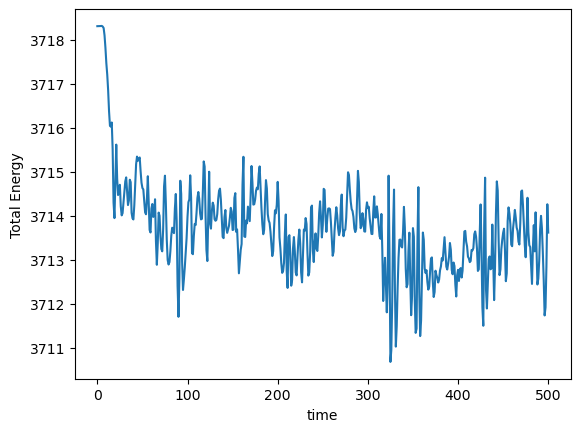

In [398]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [391]:
positions = np.load('Results/test_pos.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

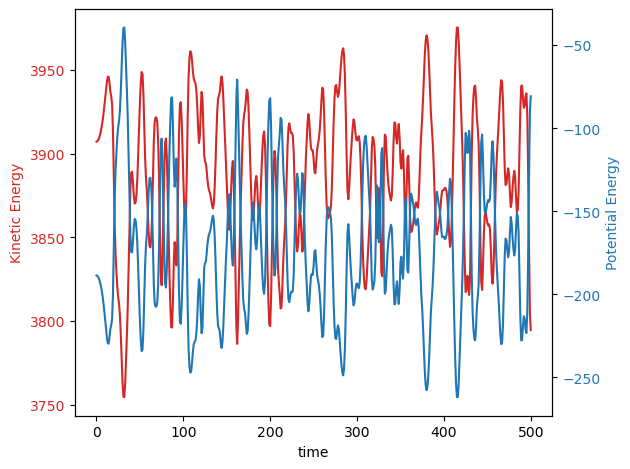

In [392]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

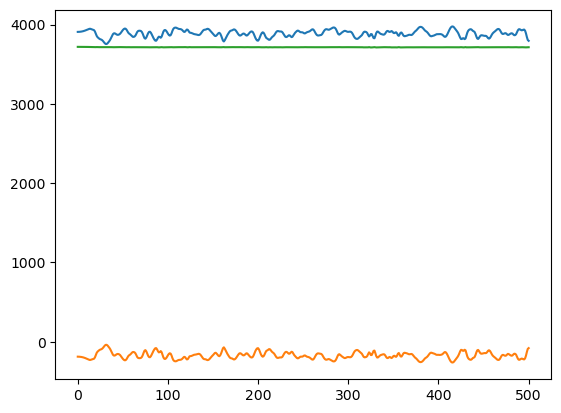

In [393]:
plt.plot(kinetic)
plt.plot(potential)
plt.plot(potential+kinetic)
plt.show()

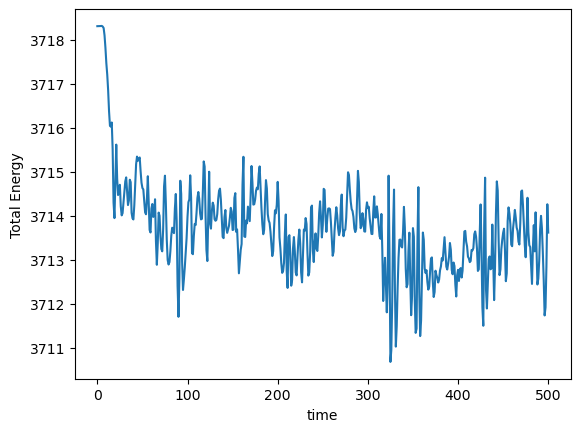

In [394]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [310]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

## 500 Steps

In [312]:
step = 300
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

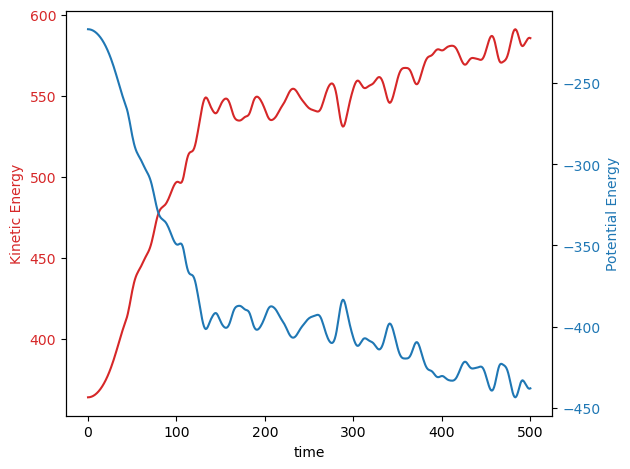

In [313]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

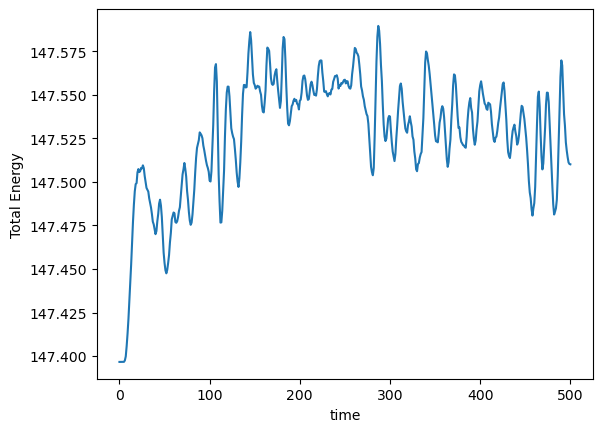

In [314]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

## Cut Off radius r_c=2.5

In [315]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

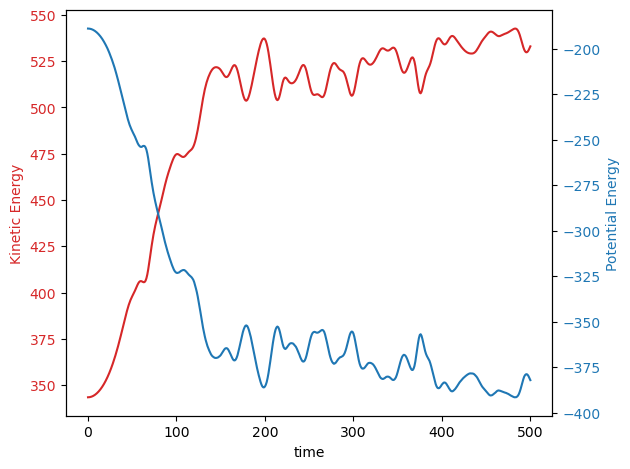

In [316]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

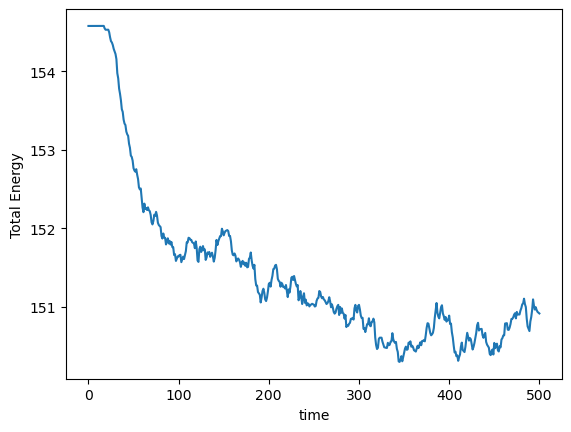

In [317]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

## 1000 Steps

In [319]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

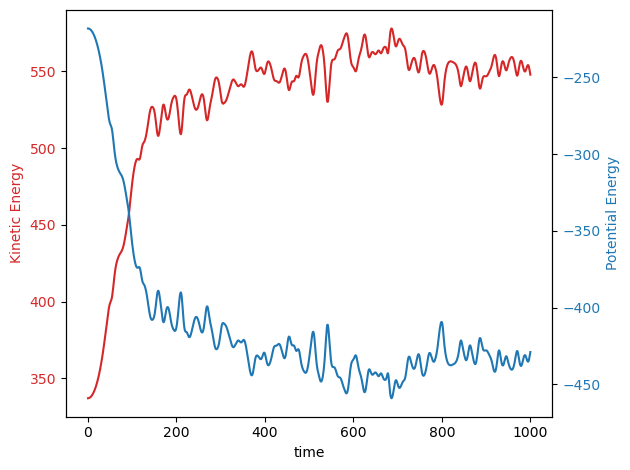

In [320]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

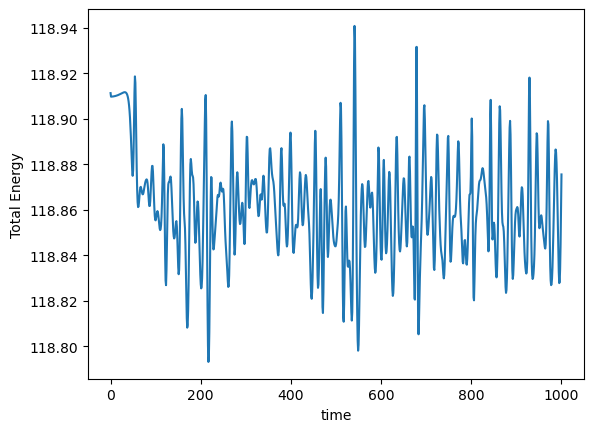

In [321]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

## r_c= 2.5

In [322]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

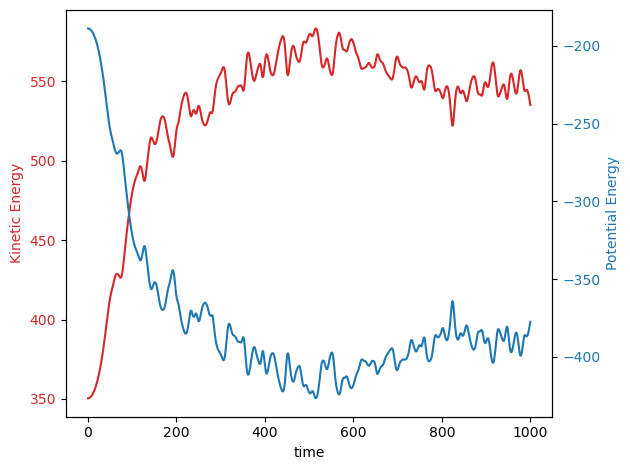

In [323]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

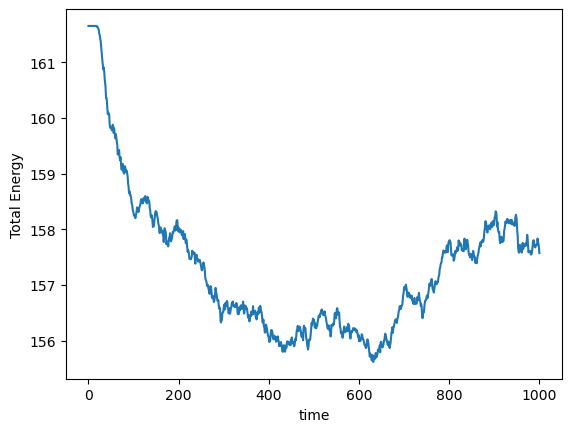

In [324]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [325]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

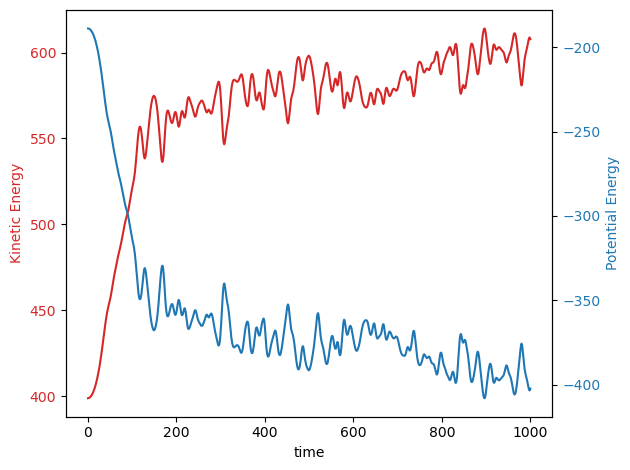

In [326]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

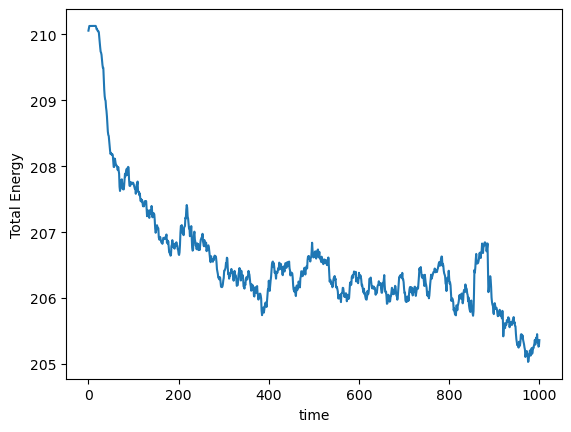

In [327]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

More or less similar behaviour. Further check should be done

## Same velocities r_c 2.5 No link cell

In [380]:
potential_NL = np.load('Results/Same_vels/wo_test_pot.npy')
kinetic_NL = np.load('Results/Same_vels/wo_test_kin.npy')

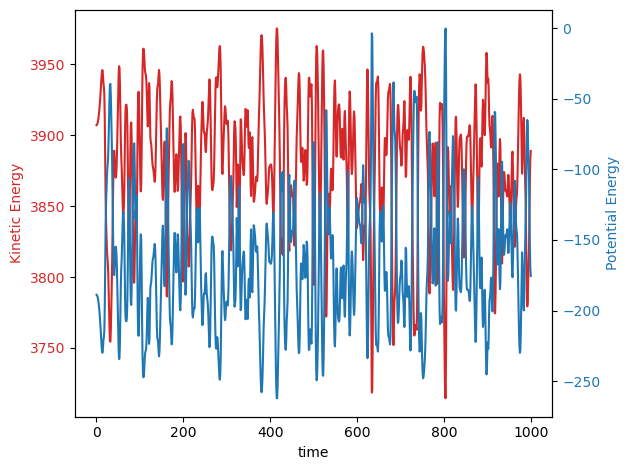

In [382]:
data1 = kinetic_NL
data2 = potential_NL

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

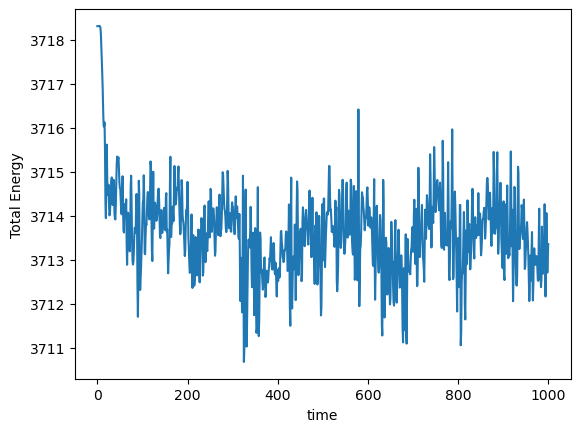

In [383]:
plt.plot(kinetic_NL+potential_NL)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [384]:
E_NL=potential_NL+kinetic_NL

# WIth

In [368]:
kinetic = np.load('Results/Same_vels/P_w_test_kin.npy')
potential = np.load('Results/Same_vels/P_w_test_pot.npy')

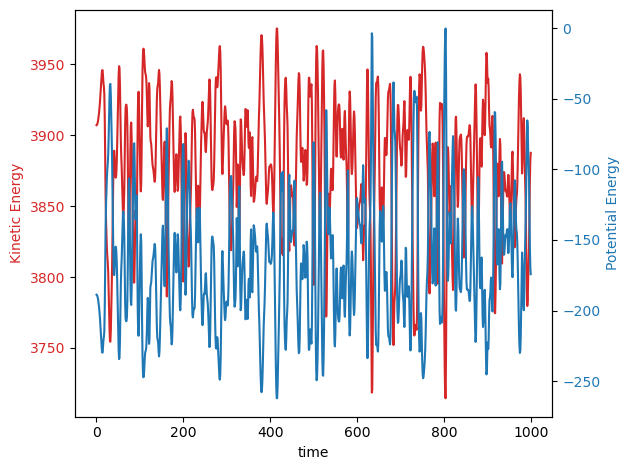

In [369]:
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

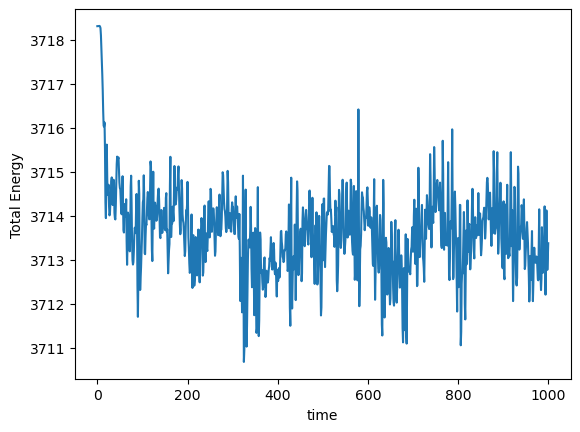

In [370]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [371]:
E=kinetic+potential

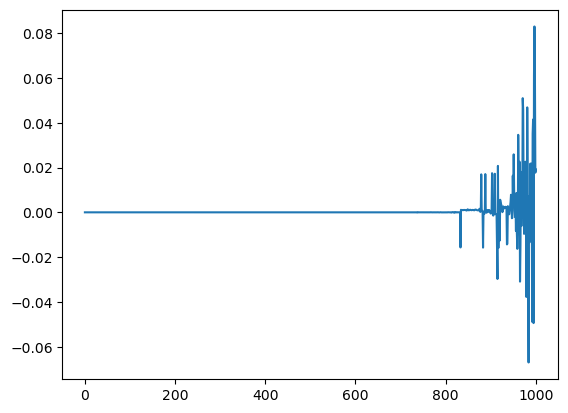

In [385]:
plt.plot(E-E_NL)

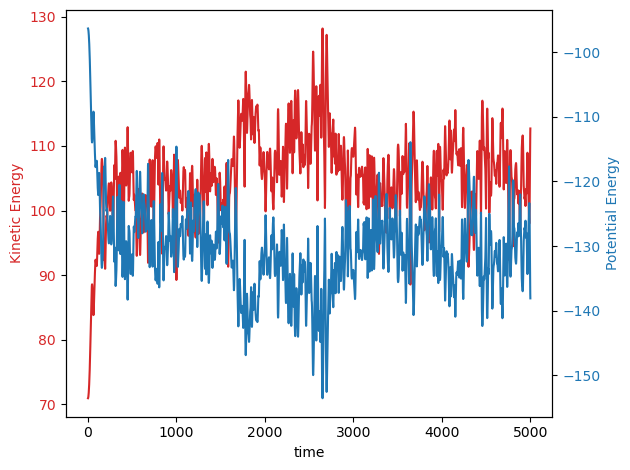

In [278]:
#time = np.arange(0,16+.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

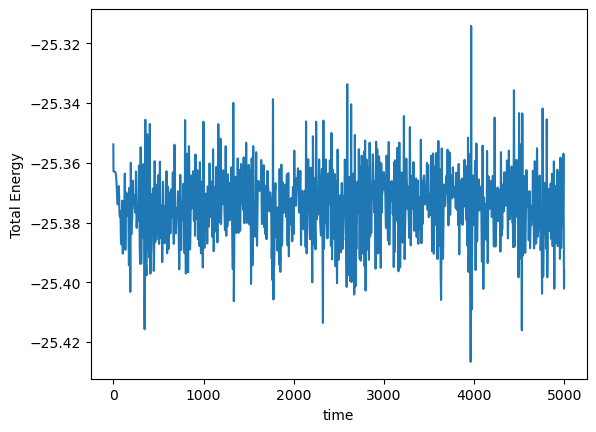

In [279]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [271]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

In [254]:
step = 1000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

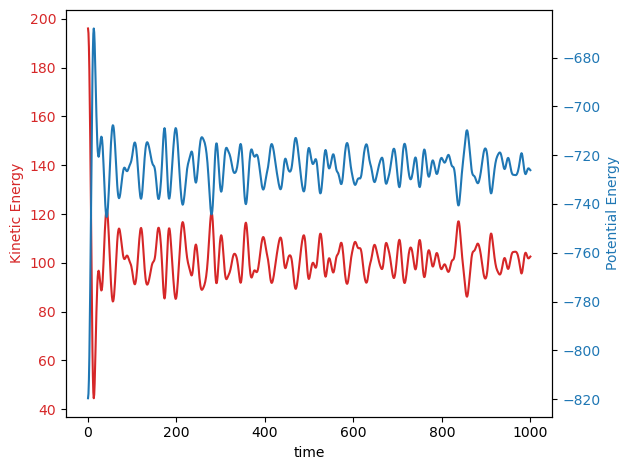

In [255]:
#time = np.arange(0,16+.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

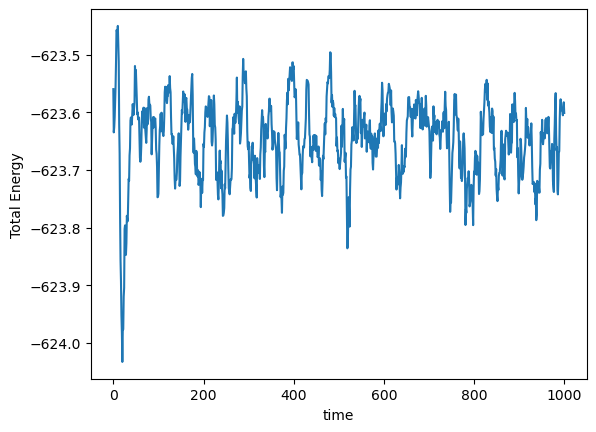

In [256]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [247]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

In [249]:
step = 0
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

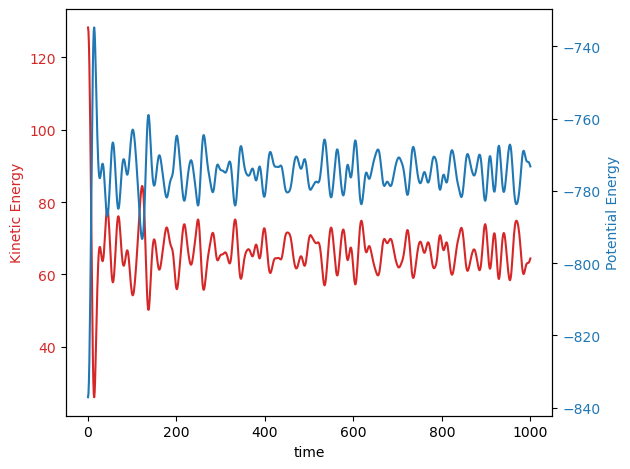

In [250]:
#time = np.arange(0,16+.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

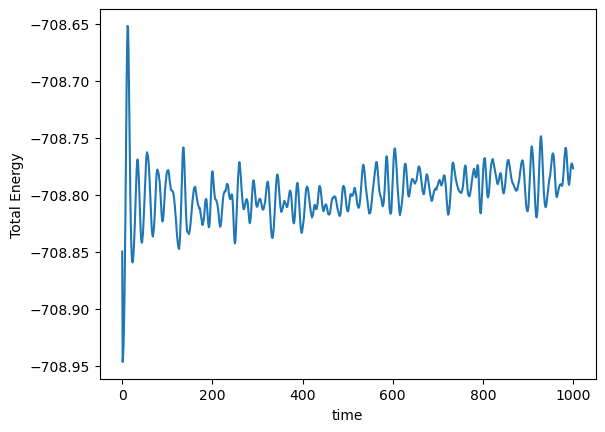

In [251]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [235]:
positions = np.load('Results/test_pos_.npy')
kinetic = np.load('Results/test_kin.npy')
potential = np.load('Results/test_pot.npy')

In [240]:
step = 1000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

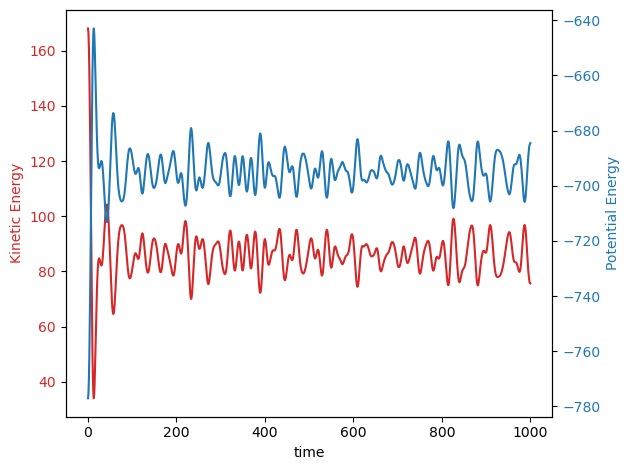

In [241]:
#time = np.arange(0,16+.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

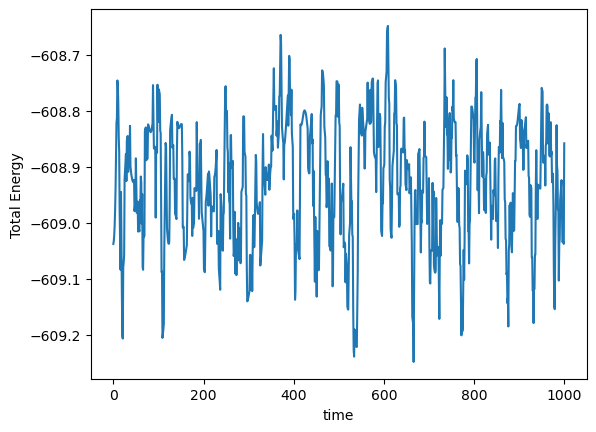

In [242]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

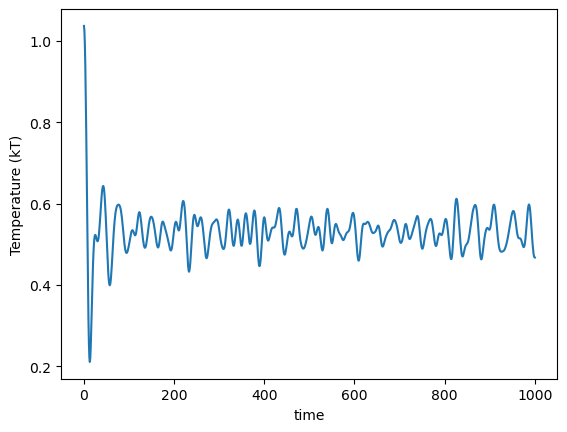

In [246]:
num_particles = positions.shape[1]
plt.plot(kinetic*2/(3*num_particles))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

In [207]:
positions = np.load('Results/test_pos_NT_WL.npy')
kinetic = np.load('Results/test_kin_NT_WL.npy')
potential = np.load('Results/test_pot_NT_WL.npy')

In [208]:
step = 4000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

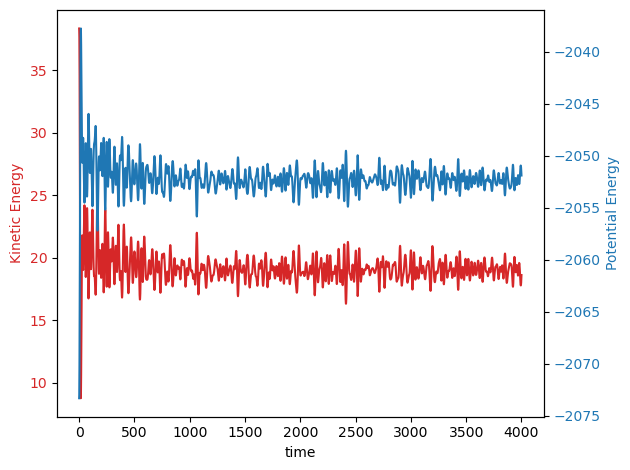

In [225]:
#time = np.arange(0,16+.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

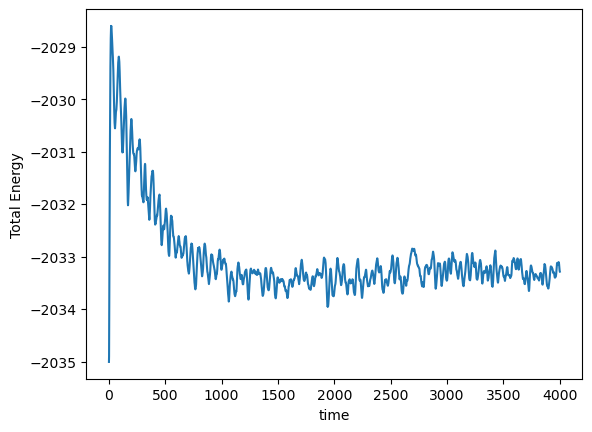

In [227]:
plt.plot(kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [513]:
positions = np.load("Results/pos_solid.npy")
kinetic = np.load("Results/kin_solid.npy")
potential = np.load("Results/pot_solid.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'Results/pos_solid.npy'

In [202]:
step = 10000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

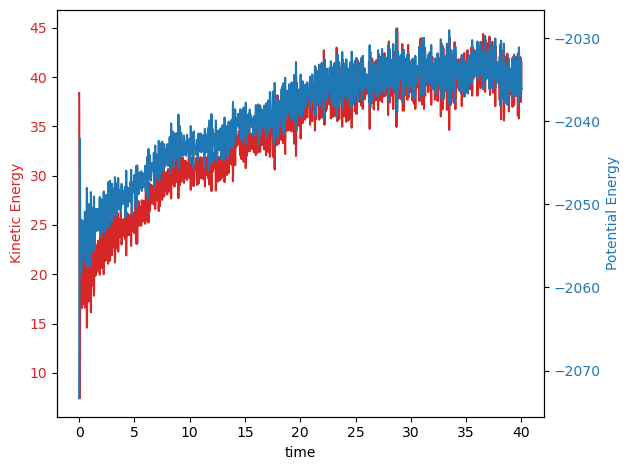

In [204]:
# Data
time = np.arange(0,40+0.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

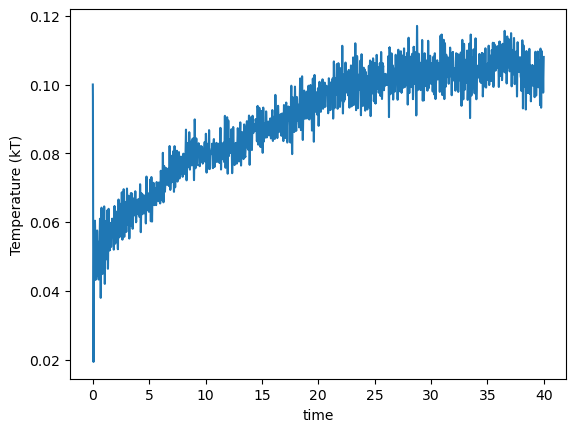

In [205]:
plt.plot(time,kinetic*2/(3*256))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

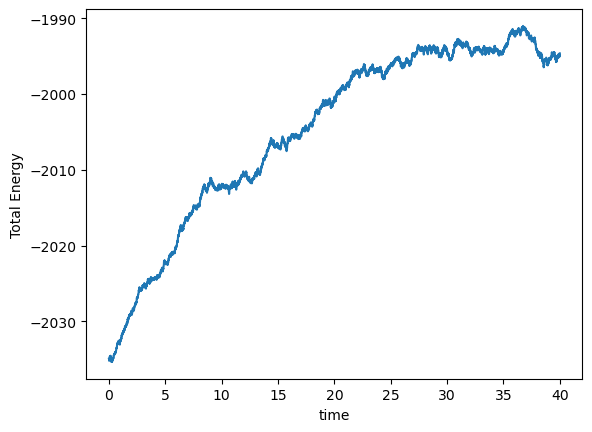

In [206]:
plt.plot(time,kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

In [104]:
positions = np.load("Results/test_pos.npy")
kinetic = np.load("Results/test_kin.npy")
potential = np.load("Results/test_pot.npy")

In [112]:
step = 1000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

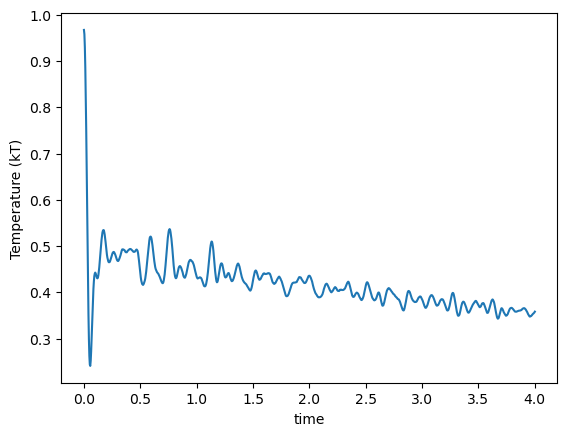

In [113]:
plt.plot(time,kinetic*2/(3*256))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

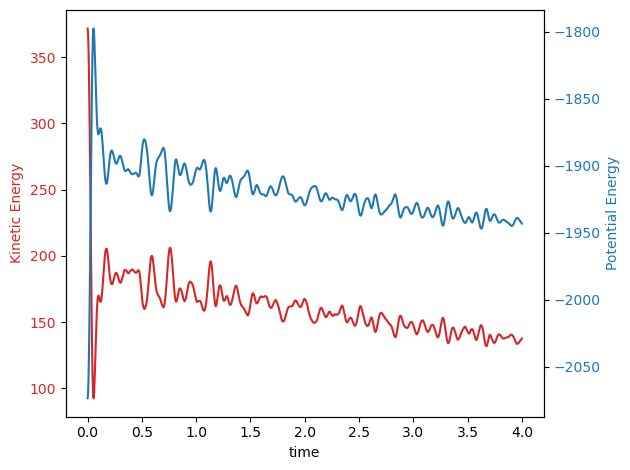

In [110]:
# Data
time = np.arange(0,4+0.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [69]:
positions = np.load("Results/linkcell_test_pos_NoTherm.npy")
kinetic = np.load("Results/linkcell_test_kin_NoTherm.npy")
potential = np.load("Results/linkcell_test_pot_NoTherm.npy")


In [83]:
step = 5000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

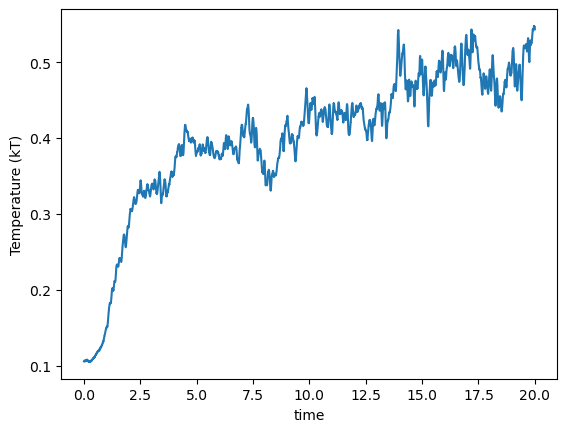

In [88]:
plt.plot(time,kinetic*2/(3*128))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

In [91]:
file_name = "hola"
file_complete_name = "Results/"+file_name

In [92]:
file_complete_name

'Results/hola'

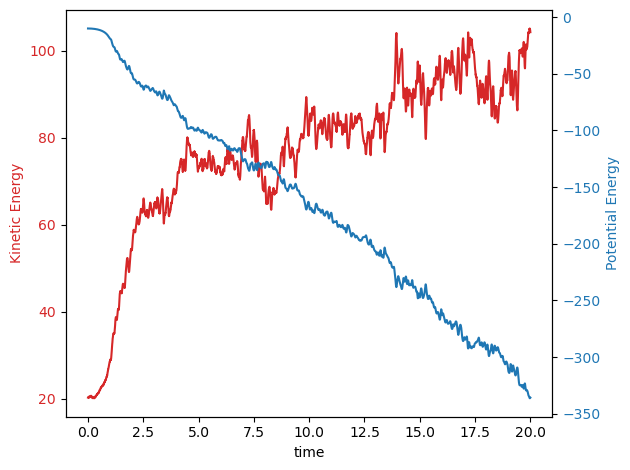

In [89]:
# Data
time = np.arange(0,20+0.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [84]:
positions.shape

(5001, 128, 3)

In [71]:
step = 0
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

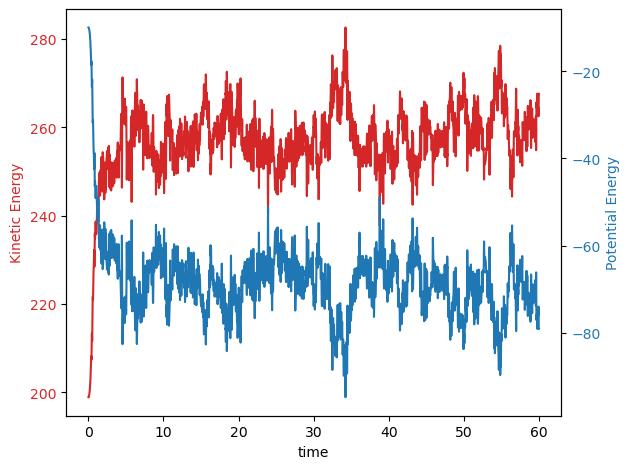

In [61]:
# Data
time = np.arange(0,60+0.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

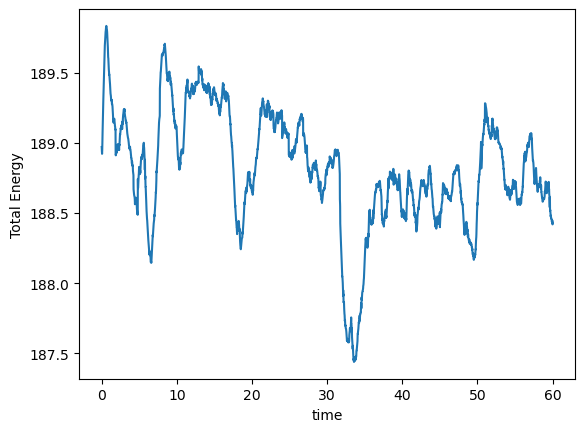

In [72]:
plt.plot(time,kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

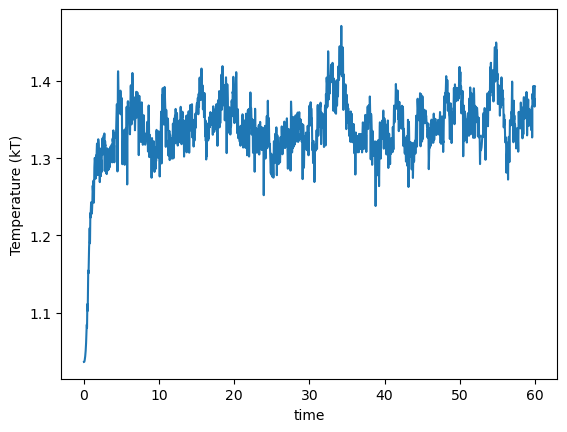

In [63]:
plt.plot(time,kinetic*2/(3*128))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

In [76]:
positions = np.load("Results/linkcell_test_pos.npy")
kinetic = np.load("Results/linkcell_test_kin.npy")
potential = np.load("Results/linkcell_test_pot.npy")

In [77]:
positions.shape

(25001, 128, 3)

In [78]:
step = 25000
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

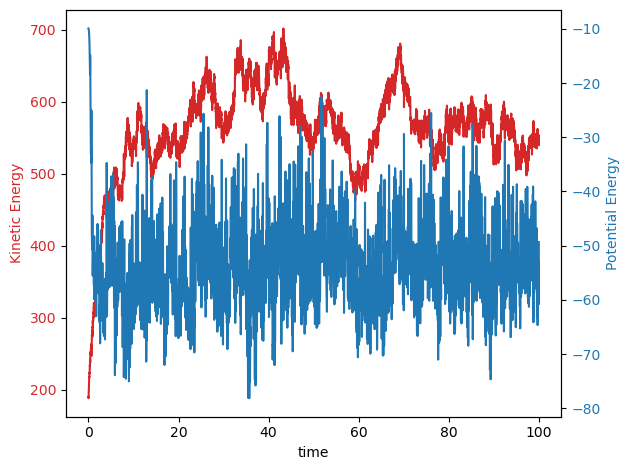

In [79]:
# Data
time = np.arange(0,100+0.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

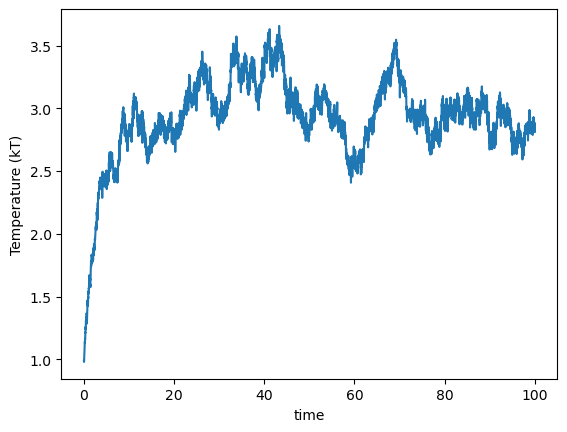

In [57]:
plt.plot(time,kinetic*2/(3*128))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

In [148]:
kinetic=np.load("Results/Notherm_KE.npy")
potential=np.load("Results/Notherm_PE.npy")
positions=np.load("Results/Notherm_positions.npy")

In [149]:
num_molecules = positions.shape[1]

In [150]:
step = 0
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)
iplot([trace], show_link=False)

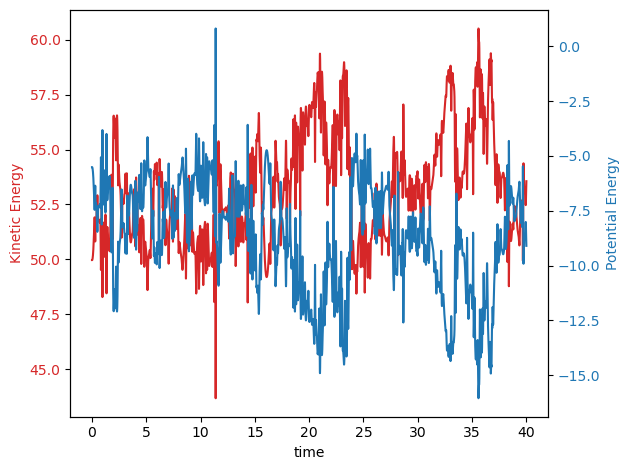

In [151]:
# Data
time = np.arange(0,40+0.004,0.004)  
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

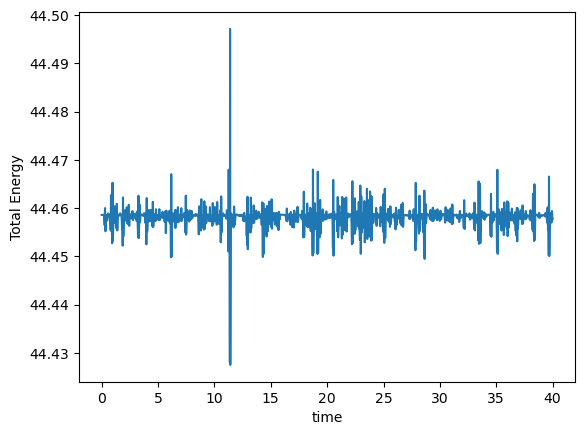

In [152]:
plt.plot(time,kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

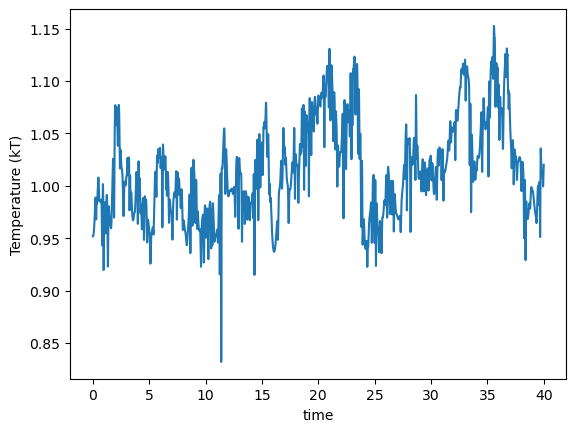

In [153]:
plt.plot(time,kinetic*2/(3*35))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

In [154]:
kinetic=np.load("Results/kT1_KE.npy")
potential=np.load("Results/kT1_PE.npy")
positions=np.load("Results/kT1_positions.npy")

In [155]:
step = 0
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)
iplot([trace], show_link=False)

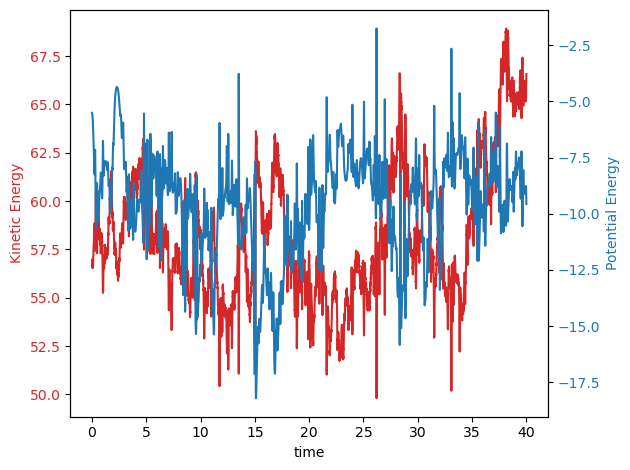

In [156]:
# Data
time = np.arange(0,40+0.004,0.004)
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

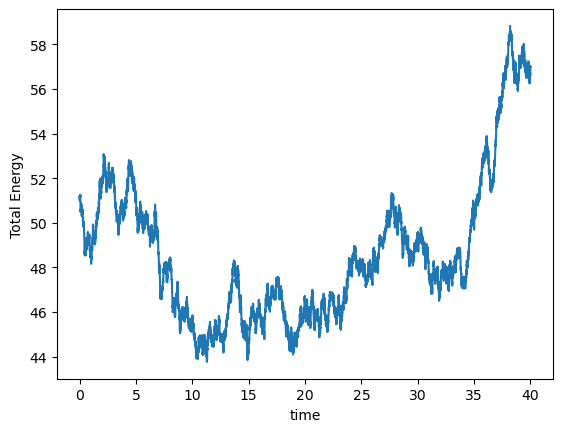

In [157]:
plt.plot(time,kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

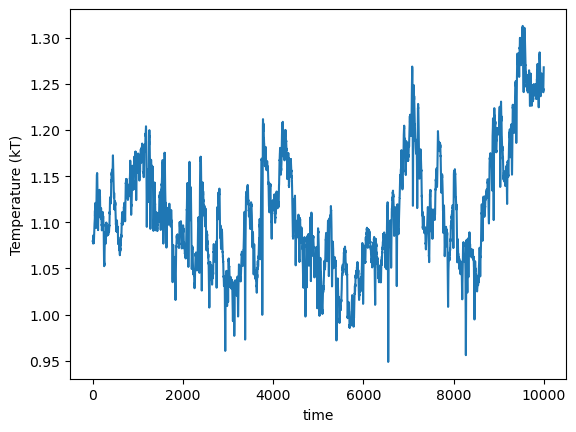

In [158]:
plt.plot(kinetic*2/(3*35))
plt.xlabel('time');
plt.ylabel('Temperature (kT)');

In [122]:
kinetic=np.load("Results/kT2_KE.npy")
potential=np.load("Results/kT2_PE.npy")
positions=np.load("Results/kT2_positions.npy")

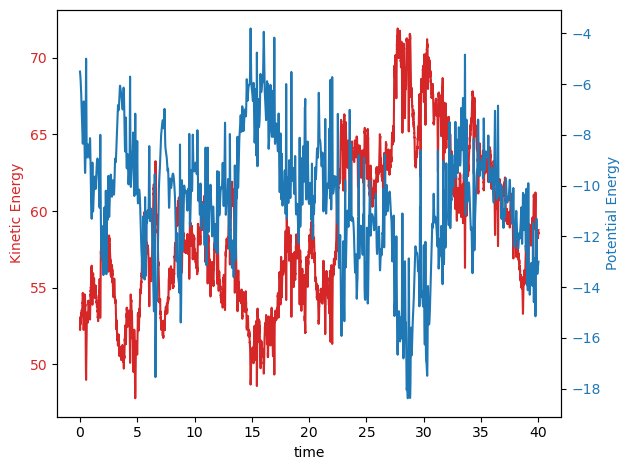

In [123]:
# Data
time = np.arange(0,40+0.004,0.004)
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

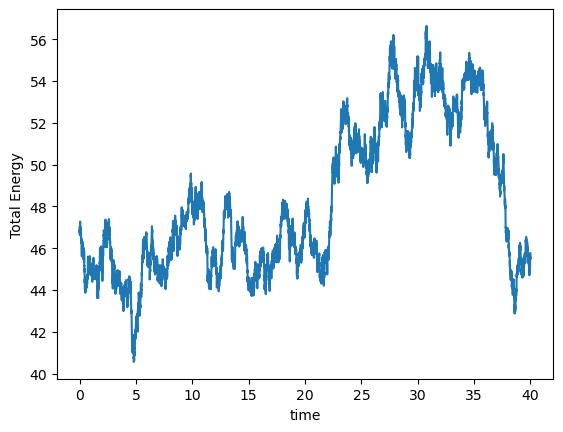

In [124]:
plt.plot(time,kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

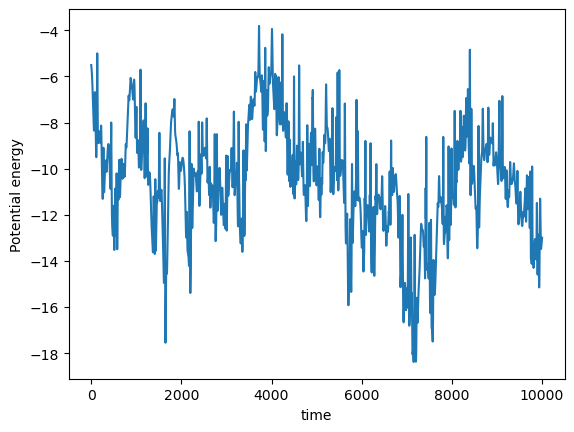

In [125]:
plt.plot(potential)
plt.xlabel('time');
plt.ylabel('Potential energy');

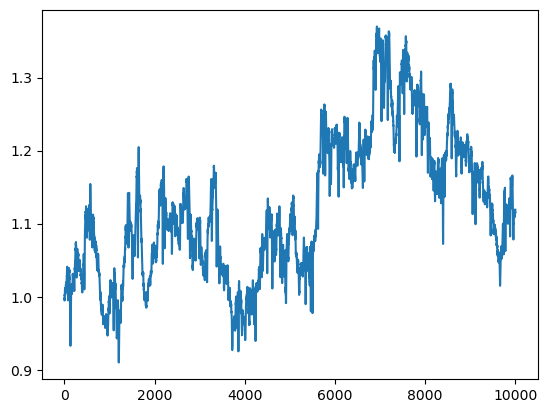

In [126]:
plt.plot(2*kinetic/(3*num_molecules))

In [170]:
kinetic=np.load("Results/kT3_KE.npy")
potential=np.load("Results/kT3_PE.npy")
positions=np.load("Results/kT3_positions.npy")

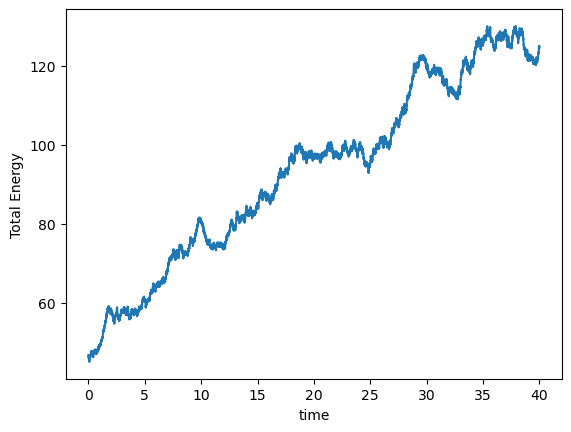

In [ ]:
plt.plot(time,kinetic+potential)
plt.xlabel('time');
plt.ylabel('Total Energy');

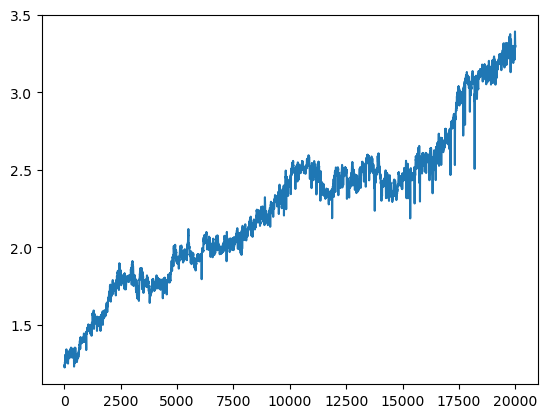

In [141]:
plt.plot(2*kinetic/(3*num_molecules))

In [127]:
kinetic=np.load("Results/kT3_gp1_KE.npy")
potential=np.load("Results/kT3_gp1_PE.npy")
positions=np.load("Results/kT3_gp1_positions.npy")

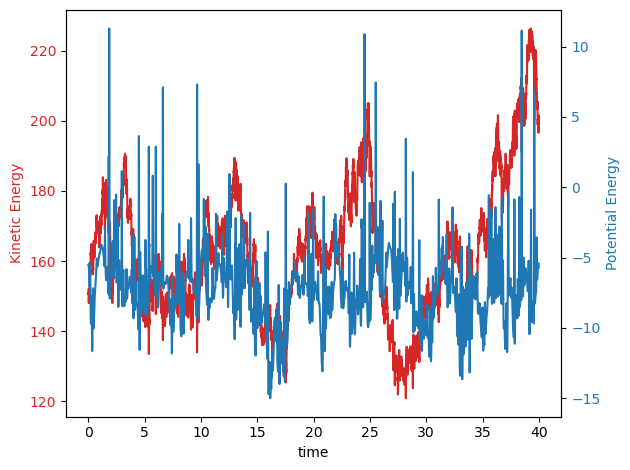

In [117]:
# Data
time = np.arange(0,40+0.004,0.004)
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

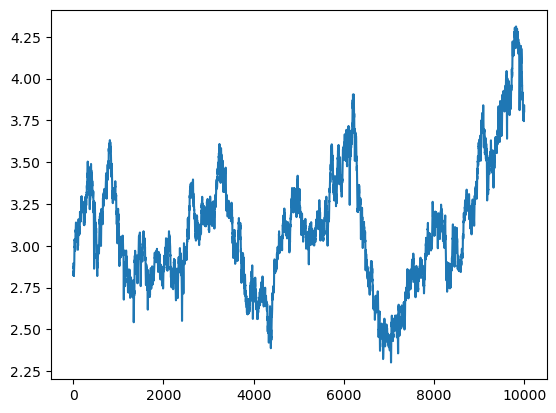

In [118]:
plt.plot(2*kinetic/(3*num_molecules))

In [119]:
kinetic=np.load("Results/kT3_gp001_KE.npy")
potential=np.load("Results/kT3_gp001_PE.npy")
positions=np.load("Results/kT3_gp001_positions.npy")

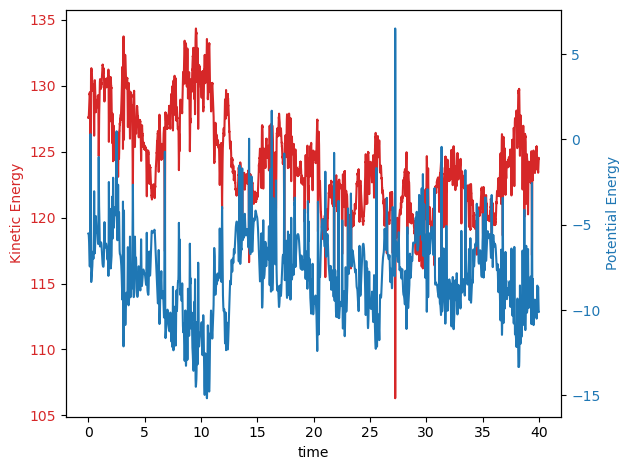

In [120]:
# Data
time = np.arange(0,40+0.004,0.004)
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

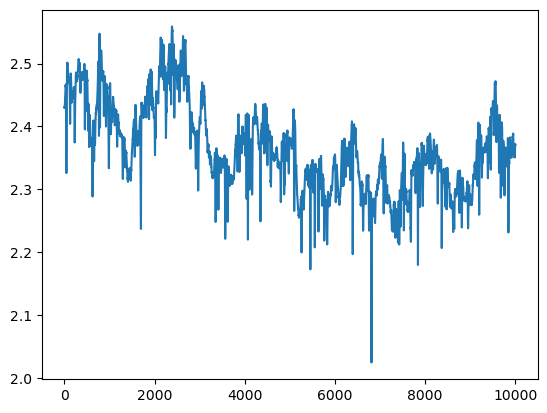

In [121]:
plt.plot(2*kinetic/(3*num_molecules))

In [167]:
kinetic=np.load("Results/kT3_KE.npy")
potential=np.load("Results/kT3_PE.npy")
positions=np.load("Results/kT3_positions.npy")

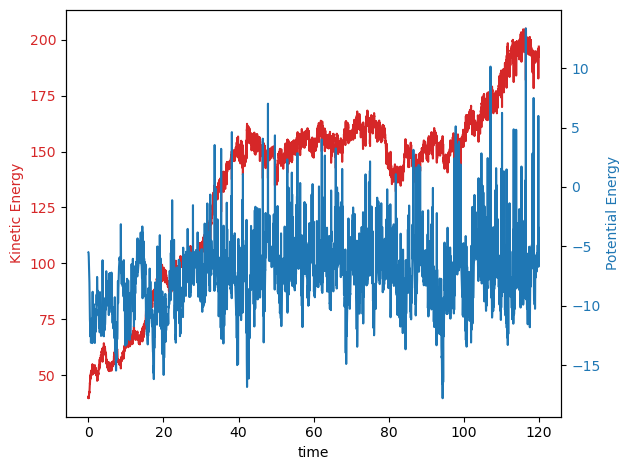

In [168]:
# Data
time = np.arange(0,120+0.004,0.004)
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

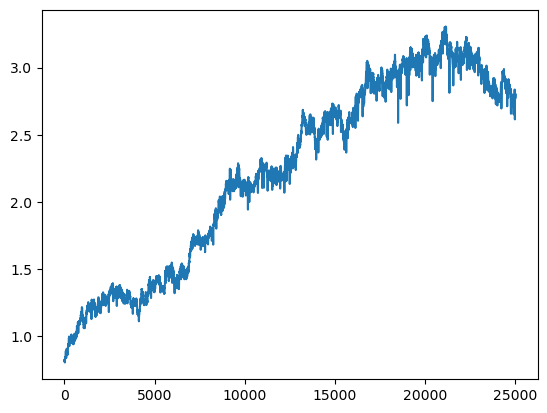

In [165]:
plt.plot(2*kinetic/(3*num_molecules))

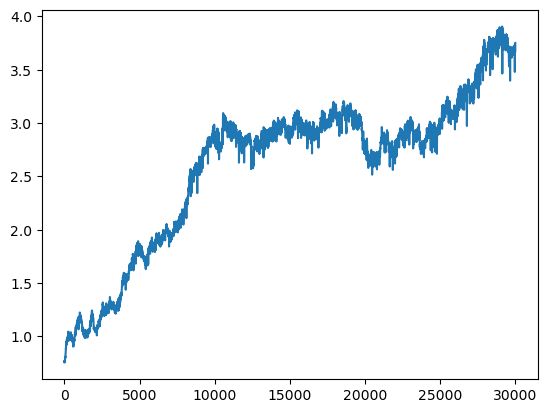

In [169]:
plt.plot(2*kinetic/(3*num_molecules))

In [9]:
positions=np.load("Results/nbcc_kTp1_pos.npy")
kinetic=np.load("Results/nbcc_kTp1_kin.npy")
potential=np.load("Results/nbcc_kTp1_pot.npy")

In [10]:
step = 0
latt_x = positions[step][:,0]
latt_y = positions[step][:,1]
latt_z = positions[step][:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)
iplot([trace], show_link=False)

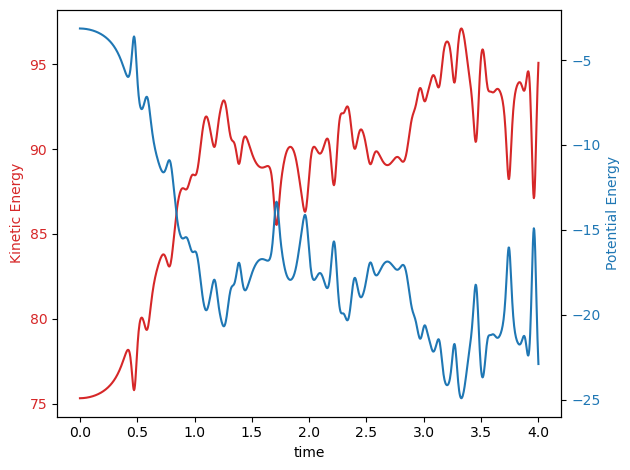

In [248]:
# Data
num_molecules = positions.shape[1]
time = np.arange(0,4+0.004,0.004)
data1 = kinetic
data2 = potential

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Kinetic Energy', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Potential Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

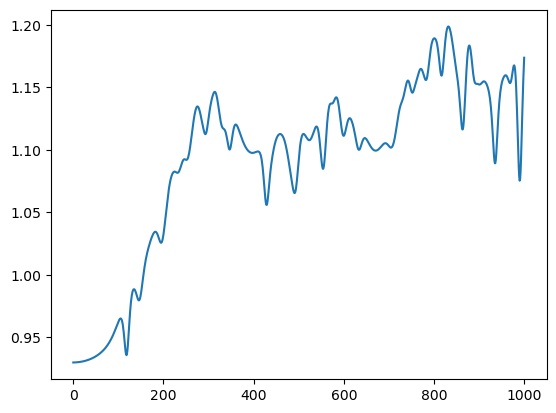

In [249]:
plt.plot(2*kinetic/(3*num_molecules))

In [176]:
unit_cell= np.array([[0, 0, 0],[0.5, 0.5, 0],[0, 0.5, 0.5],[0.5, 0, 0.5]])

In [177]:
unit_cell

array([[0. , 0. , 0. ],
       [0.5, 0.5, 0. ],
       [0. , 0.5, 0.5],
       [0.5, 0. , 0.5]])

In [178]:
side_copies = 4
displacements = np.array([np.array([x,y,z]) for x in range(side_copies) for y in range(side_copies) for z in range(side_copies)  ])

In [179]:
displacements

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 2],
       [0, 0, 3],
       [0, 1, 0],
       [0, 1, 1],
       [0, 1, 2],
       [0, 1, 3],
       [0, 2, 0],
       [0, 2, 1],
       [0, 2, 2],
       [0, 2, 3],
       [0, 3, 0],
       [0, 3, 1],
       [0, 3, 2],
       [0, 3, 3],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 2],
       [1, 0, 3],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 3],
       [1, 2, 0],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 3],
       [1, 3, 0],
       [1, 3, 1],
       [1, 3, 2],
       [1, 3, 3],
       [2, 0, 0],
       [2, 0, 1],
       [2, 0, 2],
       [2, 0, 3],
       [2, 1, 0],
       [2, 1, 1],
       [2, 1, 2],
       [2, 1, 3],
       [2, 2, 0],
       [2, 2, 1],
       [2, 2, 2],
       [2, 2, 3],
       [2, 3, 0],
       [2, 3, 1],
       [2, 3, 2],
       [2, 3, 3],
       [3, 0, 0],
       [3, 0, 1],
       [3, 0, 2],
       [3, 0, 3],
       [3, 1, 0],
       [3, 1, 1],
       [3, 1, 2],
       [3,

In [180]:
len(unit_cell)

4

In [181]:
a=np.array([unit_cell+displacement for displacement in displacements])

In [182]:
a=a.reshape(len(unit_cell)*len(displacements),3)

In [187]:
step = 0
latt_x = b[:,0]
latt_y = b[:,1]
latt_z = b[:,2]
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 4, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)

iplot([trace], show_link=False)

In [184]:
b=a*1.5

In [185]:
4*1.5

6.0

In [186]:
b.max()

5.25

In [171]:
b

array([[0.  , 0.  , 0.  ],
       [0.75, 0.75, 0.  ],
       [0.  , 0.75, 0.75],
       [0.75, 0.  , 0.75],
       [0.  , 0.  , 1.5 ],
       [0.75, 0.75, 1.5 ],
       [0.  , 0.75, 2.25],
       [0.75, 0.  , 2.25],
       [0.  , 0.  , 3.  ],
       [0.75, 0.75, 3.  ],
       [0.  , 0.75, 3.75],
       [0.75, 0.  , 3.75],
       [0.  , 1.5 , 0.  ],
       [0.75, 2.25, 0.  ],
       [0.  , 2.25, 0.75],
       [0.75, 1.5 , 0.75],
       [0.  , 1.5 , 1.5 ],
       [0.75, 2.25, 1.5 ],
       [0.  , 2.25, 2.25],
       [0.75, 1.5 , 2.25],
       [0.  , 1.5 , 3.  ],
       [0.75, 2.25, 3.  ],
       [0.  , 2.25, 3.75],
       [0.75, 1.5 , 3.75],
       [0.  , 3.  , 0.  ],
       [0.75, 3.75, 0.  ],
       [0.  , 3.75, 0.75],
       [0.75, 3.  , 0.75],
       [0.  , 3.  , 1.5 ],
       [0.75, 3.75, 1.5 ],
       [0.  , 3.75, 2.25],
       [0.75, 3.  , 2.25],
       [0.  , 3.  , 3.  ],
       [0.75, 3.75, 3.  ],
       [0.  , 3.75, 3.75],
       [0.75, 3.  , 3.75],
       [1.5 , 0.  , 0.  ],
 

In [175]:
b.max()

3.75

In [172]:
def checkIfDuplicates_1(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True

In [157]:
a

array([[0. , 0. , 1. ],
       [0.5, 0.5, 1. ],
       [0. , 0.5, 1.5],
       [0.5, 0. , 1.5],
       [0. , 0. , 2. ],
       [0.5, 0.5, 2. ],
       [0. , 0.5, 2.5],
       [0.5, 0. , 2.5],
       [0. , 1. , 0. ],
       [0.5, 1.5, 0. ],
       [0. , 1.5, 0.5],
       [0.5, 1. , 0.5],
       [0. , 1. , 1. ],
       [0.5, 1.5, 1. ],
       [0. , 1.5, 1.5],
       [0.5, 1. , 1.5],
       [0. , 1. , 2. ],
       [0.5, 1.5, 2. ],
       [0. , 1.5, 2.5],
       [0.5, 1. , 2.5],
       [0. , 2. , 0. ],
       [0.5, 2.5, 0. ],
       [0. , 2.5, 0.5],
       [0.5, 2. , 0.5],
       [0. , 2. , 1. ],
       [0.5, 2.5, 1. ],
       [0. , 2.5, 1.5],
       [0.5, 2. , 1.5],
       [0. , 2. , 2. ],
       [0.5, 2.5, 2. ],
       [0. , 2.5, 2.5],
       [0.5, 2. , 2.5],
       [1. , 0. , 0. ],
       [1.5, 0.5, 0. ],
       [1. , 0.5, 0.5],
       [1.5, 0. , 0.5],
       [1. , 0. , 1. ],
       [1.5, 0.5, 1. ],
       [1. , 0.5, 1.5],
       [1.5, 0. , 1.5],
       [1. , 0. , 2. ],
       [1.5, 0.5